# [Facebook Prophet](https://github.com/facebook/prophet) and [NeuralProphet](https://github.com/ourownstory/neural_prophet) Comparison
By: Rayhan Ozzy Ertarto

The goal of this notebook is to compare the *expected values* forecasted by these two models and compare them against the actuals in order to calculate the performance metrics and define which model performs better using this time series dataset (Rainfall in Kemayoran BMKG Station, Central Jakarta)

Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(1234)

In [3]:
plt.style.use('ggplot')

Reading the time series

In [62]:
gsheetkey = "1QUan4wVK8yNaIDvLvQEXocTWch8xkjy8kvS53PAKt_U"

url=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=csv'
df_km = pd.read_csv(url)
df_km.head(10)

,Tanggal,RR
0,01-01-2021,13.8
1,02-01-2021,8888.0
2,03-01-2021,NaN
3,04-01-2021,9.4
4,05-01-2021,0.0
5,06-01-2021,8.2
6,07-01-2021,40.5
7,08-01-2021,2.0
8,09-01-2021,14.4
9,10-01-2021,34.3


In [63]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  424 non-null    object 
 1   RR       319 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [64]:
df_km['RR'] = df_km['RR'].replace([8888.0],['NaN'])

In [65]:
df_km['RR'] = df_km['RR'].replace([9999.0],['NaN'])

In [66]:
df_km.head(10)

,Tanggal,RR
0,01-01-2021,13.8
1,02-01-2021,NaN
2,03-01-2021,NaN
3,04-01-2021,9.4
4,05-01-2021,0.0
5,06-01-2021,8.2
6,07-01-2021,40.5
7,08-01-2021,2.0
8,09-01-2021,14.4
9,10-01-2021,34.3


In [67]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  424 non-null    object
 1   RR       319 non-null    object
dtypes: object(2)
memory usage: 6.8+ KB


In [68]:
df_km['RR'] = df_km['RR'].astype(float)
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  424 non-null    object 
 1   RR       289 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [69]:
df_km.head()

,Tanggal,RR
0,01-01-2021,13.8
1,02-01-2021,NaN
2,03-01-2021,NaN
3,04-01-2021,9.4
4,05-01-2021,0.0


Check for Missing Values

In [70]:
df_km.isna().sum()

Tanggal      0
RR         135
dtype: int64

Fill Missing Values by Interpolation

In [71]:
df_km = df_km.interpolate()

In [72]:
df_km.isna().sum()

Tanggal    0
RR         0
dtype: int64

In [73]:
df_km.head(10)

,Tanggal,RR
0,01-01-2021,13.800000
1,02-01-2021,12.333333
2,03-01-2021,10.866667
3,04-01-2021,9.400000
4,05-01-2021,0.000000
5,06-01-2021,8.200000
6,07-01-2021,40.500000
7,08-01-2021,2.000000
8,09-01-2021,14.400000
9,10-01-2021,34.300000


In [74]:
df_km_time = df_km.set_index('Tanggal')
df_km_time.head()

,RR
Tanggal,
01-01-2021,13.800000
02-01-2021,12.333333
03-01-2021,10.866667
04-01-2021,9.400000
05-01-2021,0.000000


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

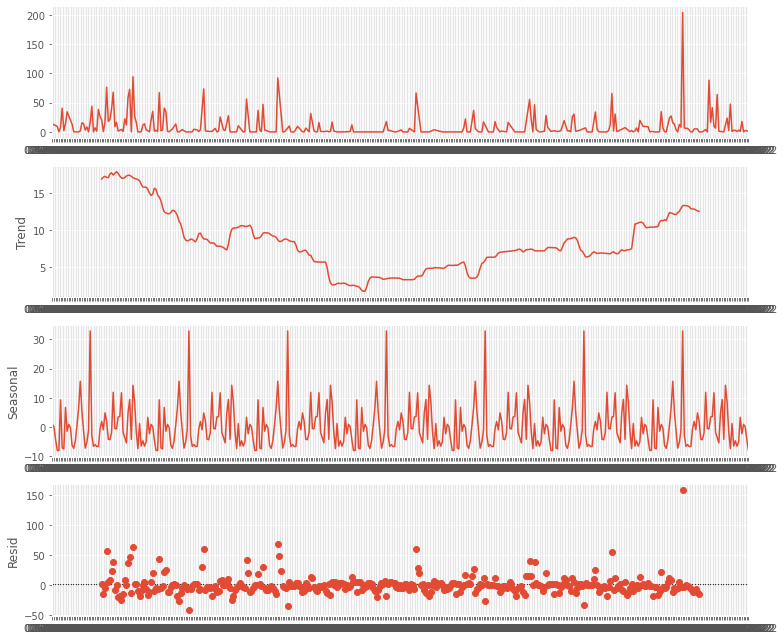

In [75]:
#Plot of decompotition
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_km_time, 
                                         model = 'additive',
                                         period=60) 
fig = decomposition.plot()
plt.show()

In [16]:
df_km['Tanggal'] = pd.to_datetime(df_km['Tanggal'])
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  424 non-null    datetime64[ns]
 1   RR       424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [17]:
# Renaming columns
df_km.rename(columns = {'Tanggal':'ds', 'RR':'y'}, inplace = True)
df_km.head()

,ds,y
0,2021-01-01,13.800000
1,2021-02-01,12.333333
2,2021-03-01,10.866667
3,2021-04-01,9.400000
4,2021-05-01,0.000000


In [18]:
df_km.tail()

,ds,y
419,2022-02-24,17.80
420,2022-02-25,0.00
421,2022-02-26,2.50
422,2022-02-27,1.75
423,2022-02-28,1.00


In [19]:
#df_km_time = df_km.set_index('ds')
#df_km_time.head()

,y
ds,
2021-01-01,13.800000
2021-02-01,12.333333
2021-03-01,10.866667
2021-04-01,9.400000
2021-05-01,0.000000


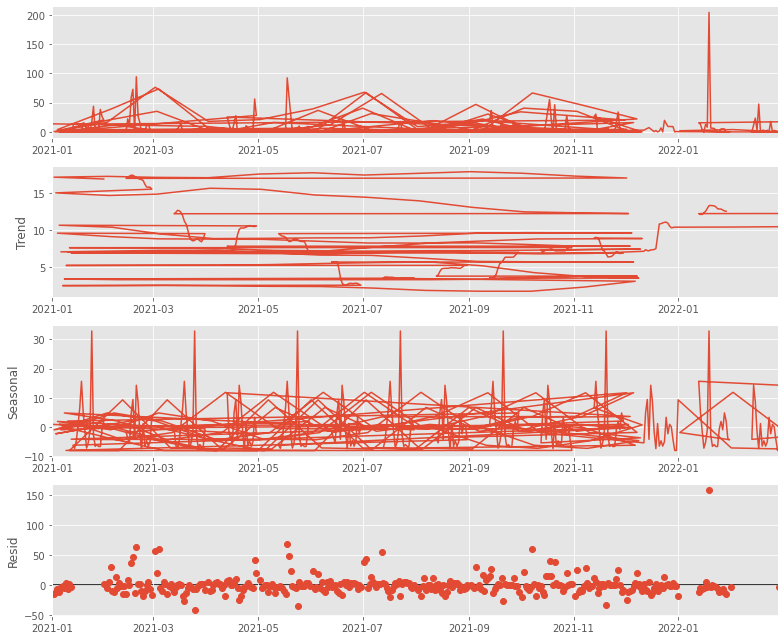

In [20]:
#Plot of decompotition
#import statsmodels.api as sm
#from pylab import rcParams
#rcParams['figure.figsize'] = 11, 9
#decomposition = sm.tsa.seasonal_decompose(df_km_time, 
#                                         model = 'additive',
#                                         period=60) 
#fig = decomposition.plot()
#plt.show()

Text(0.5, 1.0, 'Time Series Plot')

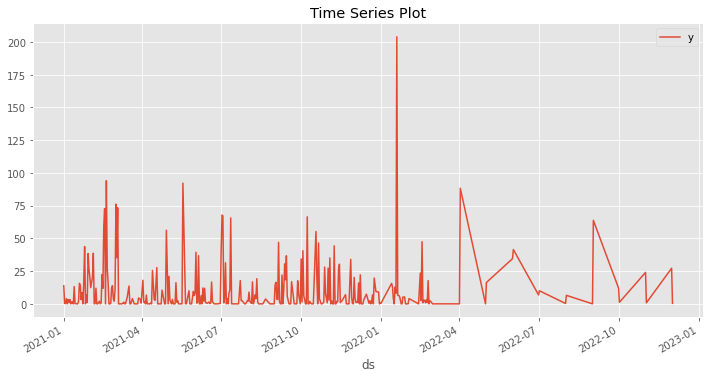

In [21]:
df_km.set_index('ds').plot(figsize=(12,6))
plt.title('Time Series Plot')

## Prophet Model

In [22]:
!pip install prophet -q

In [23]:
from prophet import Prophet

In [24]:
m = Prophet(seasonality_mode='additive')

Using default settings, only the seasonality mode is set to *Additive*



In [25]:
m.fit(df_km)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.76271


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65        811.43   0.000834223       92.6072   1.299e-05       0.001      129  LS failed, Hessian reset 
      99       811.461   6.25905e-06       77.1441     0.02701           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       811.468   4.66848e-06       59.3264      0.3613           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273        811.47   2.12311e-08       61.9847     0.02129           1      406   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [26]:
future = m.make_future_dataframe(periods=60, freq='D')

In [27]:
future.tail(5)

,ds
479,2023-01-27
480,2023-01-28
481,2023-01-29
482,2023-01-30
483,2023-01-31


In [28]:
forecast = m.predict(future)

In [29]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
479,2023-01-27,12.626045,-10.455716,34.623597,12.599801,12.650974,0.455848,0.455848,0.455848,0.455848,0.455848,0.455848,0.0,0.0,0.0,13.081893
480,2023-01-28,12.633848,-13.425113,35.414873,12.606549,12.659467,-1.282108,-1.282108,-1.282108,-1.282108,-1.282108,-1.282108,0.0,0.0,0.0,11.351741
481,2023-01-29,12.641652,-12.848378,34.350772,12.613404,12.668151,-1.881820,-1.881820,-1.881820,-1.881820,-1.881820,-1.881820,0.0,0.0,0.0,10.759831
482,2023-01-30,12.649455,-14.793096,35.282641,12.620629,12.676822,-0.884262,-0.884262,-0.884262,-0.884262,-0.884262,-0.884262,0.0,0.0,0.0,11.765193
483,2023-01-31,12.657259,-10.963324,34.523319,12.627875,12.685390,-0.056703,-0.056703,-0.056703,-0.056703,-0.056703,-0.056703,0.0,0.0,0.0,12.600555


Text(59.875, 0.5, 'Rainfall (mm)')

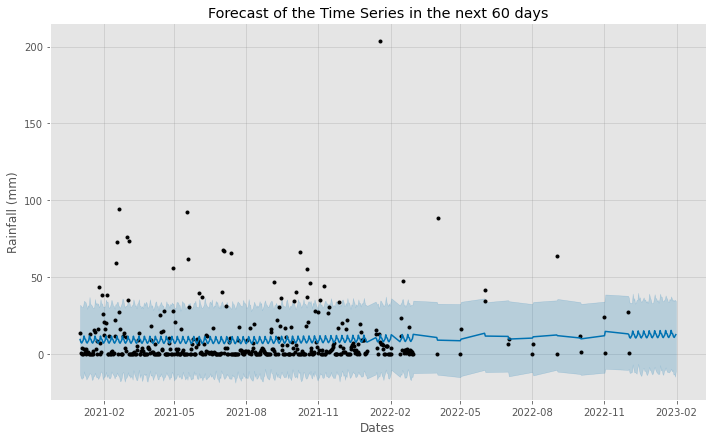

In [30]:
m.plot(forecast);
plt.title("Forecast of the Time Series in the next 60 days")
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

Components of the time series:


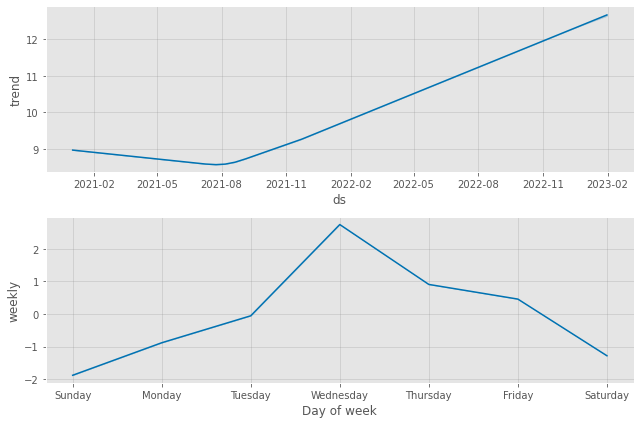

In [31]:
m.plot_components(forecast);
print("Components of the time series:")

In [32]:
#p_forecast = forecast[forecast['ds']>'2022-02-18'][['ds','yhat_lower','yhat','yhat_upper']]
p_forecast = forecast[['ds','yhat_lower','yhat','yhat_upper']]
p_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          484 non-null    datetime64[ns]
 1   yhat_lower  484 non-null    float64       
 2   yhat        484 non-null    float64       
 3   yhat_upper  484 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.2 KB


Text(0, 0.5, 'Rainfall (mm)')

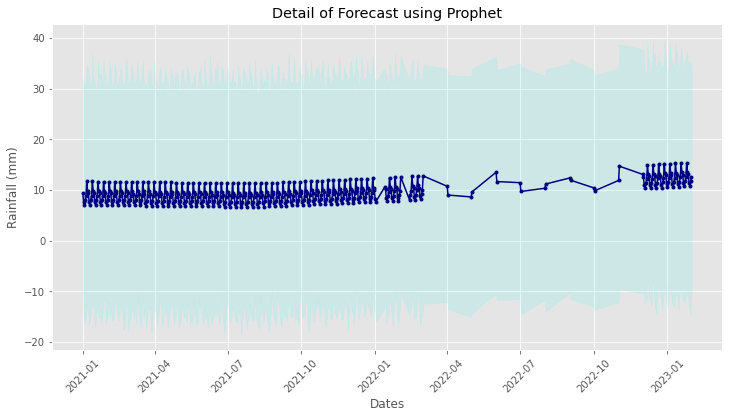

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using Prophet")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy')
plt.fill_between(p_forecast['ds'],p_forecast['yhat_lower'], p_forecast['yhat_upper'], alpha=0.1, color='cyan')
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

### Performance Metrics

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      424 non-null    datetime64[ns]
 1   y       424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB


In [36]:
df_km_merge = pd.merge(df_km, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_km_merge = df_km_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_km_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-01-01,-13.424537,32.033533,9.427249,13.800000
1,2021-02-01,-14.883335,30.647319,8.024432,12.333333
2,2021-03-01,-15.326314,31.267976,7.967793,10.866667
3,2021-04-01,-14.102800,32.561629,9.694964,9.400000
4,2021-05-01,-17.269289,28.303762,7.446556,0.000000


In [37]:
df_km_merge.tail()

,ds,yhat_lower,yhat_upper,yhat,y
419,2022-02-24,-11.195812,32.922483,10.901895,17.80
420,2022-02-25,-13.959302,33.328192,10.459930,0.00
421,2022-02-26,-16.367382,31.253870,8.729778,2.50
422,2022-02-27,-17.034003,32.002615,8.137869,1.75
423,2022-02-28,-14.669013,31.729278,9.143230,1.00


In [38]:
prophet_mse = mean_squared_error(df_km_merge['y'], df_km_merge['yhat'])
prophet_rmse = np.sqrt(mean_squared_error(df_km_merge['y'], df_km_merge['yhat']))

In [39]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 332.0514
Prophet RMSE: 18.2223


## NeuralProphet

In [40]:
!pip install neuralprophet -q

In [41]:
from neuralprophet import NeuralProphet, set_random_seed

In [42]:
set_random_seed(42)

In [43]:
nm = NeuralProphet(seasonality_mode='additive')

In [44]:
nm.fit(df_km, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.17% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.17% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True t

  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.51E-02, min: 2.30E-01
INFO:NP.utils_torch:lr-range-test results: steep: 5.51E-02, min: 2.30E-01


  0%|          | 0/117 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.59E-02, min: 1.15E+00
INFO:NP.utils_torch:lr-range-test results: steep: 6.59E-02, min: 1.15E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.14E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 7.14E-02
Epoch[262/262]: 100%|██████████| 262/262 [00:09<00:00, 28.56it/s, SmoothL1Loss=0.0727, MAE=10.2, RMSE=15.7, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.249249,23.246185,29.706783,0.0
1,0.236532,22.474020,29.093736,0.0
2,0.222575,21.645250,28.443905,0.0
3,0.207505,20.710629,27.165560,0.0
4,0.191311,19.691129,26.199353,0.0
...,...,...,...,...
257,0.072672,10.192322,15.754848,0.0
258,0.072672,10.195400,15.610277,0.0
259,0.072670,10.195809,15.640295,0.0
260,0.072669,10.195219,15.730401,0.0


In [45]:
n_future = nm.make_future_dataframe(df_km, periods=60, n_historic_predictions=len(df_km))
n_future

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 57.547% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 57.547% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


,ds,y
0,2021-01-01,13.8
1,2021-01-02,0.4
2,2021-01-03,0.2
3,2021-01-04,4.0
4,2021-01-05,0.0
...,...,...
479,2023-01-27,NaN
480,2023-01-28,NaN
481,2023-01-29,NaN
482,2023-01-30,NaN


In [46]:
n_future.tail()

,ds,y
479,2023-01-27,NaN
480,2023-01-28,NaN
481,2023-01-29,NaN
482,2023-01-30,NaN
483,2023-01-31,NaN


In [47]:
n_forecast = nm.predict(n_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.521% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.521% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.521% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.521% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


In [48]:
n_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             484 non-null    datetime64[ns]
 1   y              424 non-null    float64       
 2   yhat1          484 non-null    float64       
 3   residual1      424 non-null    float64       
 4   trend          484 non-null    float64       
 5   season_weekly  484 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 22.8 KB


In [49]:
n_forecast.tail()

,ds,y,yhat1,residual1,trend,season_weekly
479,2023-01-27,NaN,17.037827,NaN,16.948917,0.088908
480,2023-01-28,NaN,16.152885,NaN,16.992327,-0.839441
481,2023-01-29,NaN,15.983237,NaN,17.035738,-1.052501
482,2023-01-30,NaN,17.035583,NaN,17.079153,-0.043569
483,2023-01-31,NaN,16.844770,NaN,17.122564,-0.277794


Text(0, 0.5, 'Rainfall (mm)')

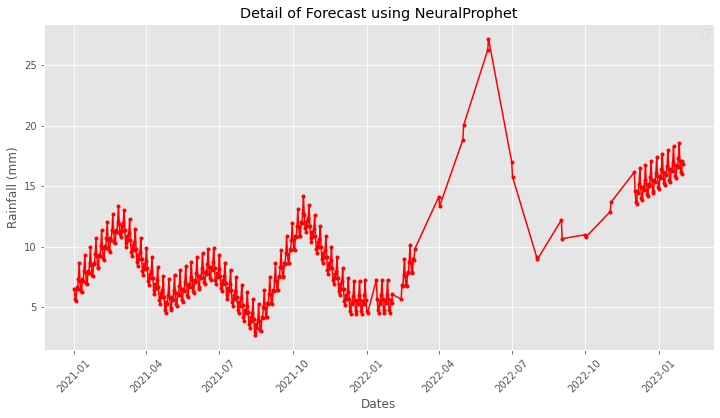

In [50]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Detail of Forecast using NeuralProphet")
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

Text(59.875, 0.5, 'Rainfall (mm)')

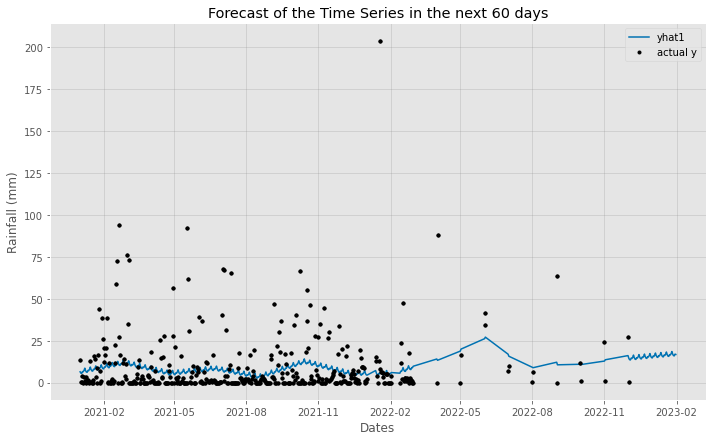

In [51]:
nm.plot(pd.concat([df_km, n_forecast], ignore_index=True));
plt.title("Forecast of the Time Series in the next 60 days")
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

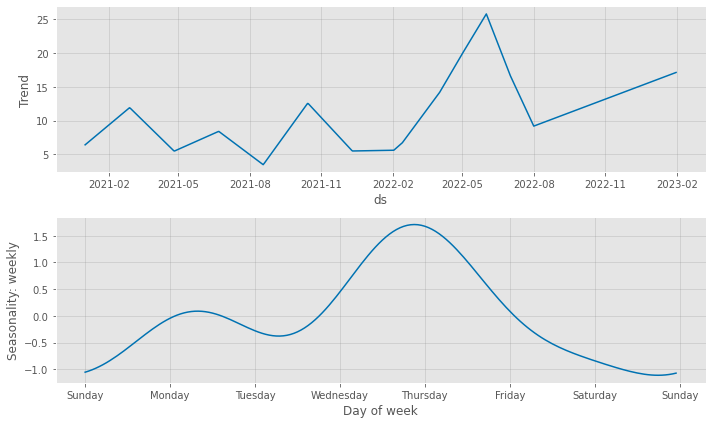

In [52]:
nm.plot_components(pd.concat([df_km, n_forecast], ignore_index=True));

### Performance Metrics

In [53]:
n_forecast

,ds,y,yhat1,residual1,trend,season_weekly
0,2021-01-01,13.8,6.493575,-7.306425,6.404667,0.088908
1,2021-01-02,0.4,5.661465,5.261465,6.500906,-0.839441
2,2021-01-03,0.2,5.544643,5.344643,6.597144,-1.052501
3,2021-01-04,4.0,6.649814,2.649814,6.693382,-0.043569
4,2021-01-05,0.0,6.511827,6.511827,6.789621,-0.277794
...,...,...,...,...,...,...
479,2023-01-27,NaN,17.037827,NaN,16.948917,0.088908
480,2023-01-28,NaN,16.152885,NaN,16.992327,-0.839441
481,2023-01-29,NaN,15.983237,NaN,17.035738,-1.052501
482,2023-01-30,NaN,17.035583,NaN,17.079153,-0.043569


In [54]:
n_forecast_merge = pd.merge(df_km, n_forecast[['ds','yhat1','residual1']],on='ds')
n_forecast_merge = n_forecast_merge[['ds','yhat1','residual1','y']]
n_forecast_merge.head()

,ds,yhat1,residual1,y
0,2021-01-01,6.493575,-7.306425,13.800000
1,2021-02-01,9.344487,-2.988846,12.333333
2,2021-03-01,11.678425,0.811758,10.866667
3,2021-04-01,9.907958,0.507958,9.400000
4,2021-05-01,4.907139,4.907139,0.000000


In [55]:
n_prophet_mse = mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1'])
n_prophet_rmse = np.sqrt(mean_squared_error(n_forecast_merge['y'], n_forecast_merge['yhat1']))

In [56]:
print("Neural Prophet MSE: {:.4f}".format(n_prophet_mse))
print("Neural Prophet RMSE: {:.4f}".format(n_prophet_rmse))

Neural Prophet MSE: 326.2231
Neural Prophet RMSE: 18.0616


In [57]:
print("Prophet MSE: {:.4f}".format(prophet_mse))
print("Prophet RMSE: {:.4f}".format(prophet_rmse))

Prophet MSE: 332.0514
Prophet RMSE: 18.2223


In [58]:
n_prophet_mse - prophet_mse

-5.828303990666825

In [59]:
n_prophet_rmse - prophet_rmse

-0.16063046496710953

Text(0, 0.5, 'Rainfall (mm)')

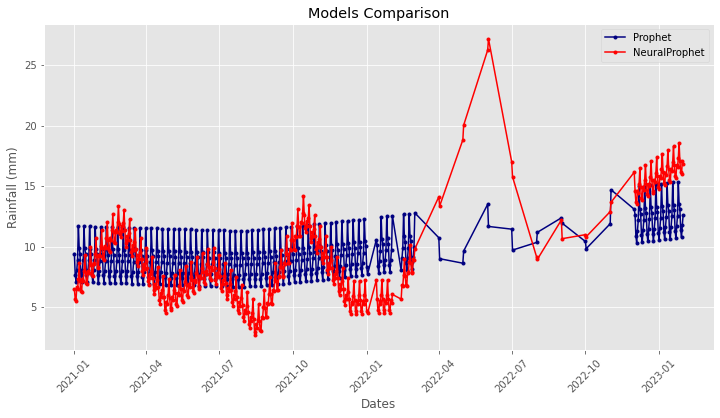

In [60]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
plt.title("Models Comparison")
plt.plot(p_forecast['ds'], p_forecast['yhat'], marker='.', c='navy', label='Prophet')
plt.plot(n_forecast['ds'], n_forecast['yhat1'], marker='.', c='red', label='NeuralProphet')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Rainfall (mm)")

In [61]:
pd.DataFrame({'metrics':['MSE','RMSE'],
              'Prophet ':[prophet_mse, prophet_rmse],
              'Neural Prophet':[n_prophet_mse, n_prophet_rmse]
             })

,metrics,Prophet,Neural Prophet
0,MSE,332.051434,326.223130
1,RMSE,18.222279,18.061648


## Final Comments

*   At least for this particular dataset and using the default arguments,  the **NeuralProphet** model scored a **MSE** of **326.223130** and **RMSE** of **18.061648** whereas the **Prophet** model scored a **MSE** of **332.051434** and **RMSE** of **18.222279**, a **5.828303990666825 and 0.16063046496710953 difference of MSE and RMSE respectively** compared against the first model.